# Project: Wrangling and Analyze Data

## Data Gathering


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
from PIL import Image
from io import BytesIO
import json

weratedogs_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [2]:
weratedogs_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
image_prediction = pd.read_csv('/home/workspace/image_prediction/image-predictions.tsv',sep='\t')
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
file1 = open('tweet-json.txt', 'r')
tweet_json = file1.readlines()

In [8]:
tweets_converted = []
for tweet in tweet_json:
    tweets_converted.append(json.loads(tweet))

In [9]:
#tweet ID, retweet count, and favorite count."
df_list = []
for tweet in tweets_converted:
        tweet_id = int(tweet['id_str'])
        retweets = tweet['retweet_count']
        number_of_likes = tweet['favorite_count']
        # Append to list of dictionaries
        df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'number_of_likes': number_of_likes})

In [10]:
# Create DataFrame from list of dictionaries
tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'number_of_likes'])
tweets

,tweet_id,retweets,number_of_likes
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing Data


In [11]:
#Programmatic Assessment
weratedogs_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
#Programmatic Assessment
weratedogs_archive.duplicated().sum()

0

In [13]:
#Programmatic Assessment
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#Programmatic Assessment
image_prediction.duplicated().sum()

0

In [15]:
#Programmatic Assessment
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null int64
retweets           2354 non-null int64
number_of_likes    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [16]:
tweets.duplicated().sum()

0

## Quality issues

#### `weratedogs_archive` columns:

### Visual Assessment
1. **name**: this column shows some unrealistic name type like single letters(a, the), there are also missing names as well as duplicated names, some name are proper case while some are all lowercase as observed via visual assessment.
**   **
2. **retweeted_status_id |** **retweeted_status_user_id |**	**retweeted_status_timestamp**: missing entries for the following variables/columns.
**   **
3. **doggo |**	**floofer |**	**pupper |** **puppo**: missing entries for the following columns.
**   **
4. **in_reply_to_status_id |** 	**in_reply_to_user_id**: Observance of missing values from these columns.
**   **
5. **floofer**: Column name error. Floofer is not a dog stage according to the Dogtionary.

### Programmatic Assessment
6. **expanded_urls**: during programmatic assessment, some values appear to be missing from this column.
**   **
7. **timestamp**: data type in this column is wrong. Should be a datetime format data type. 
**   **
8. **tweet_id**: data type in this column is not preffered. Since I won't be using the figures here to perform any calculations, it is best practice that it is coverted to a string. 
**   **


### Tidiness issues

#### `weratedogs_archive` columns:
1. **doggo |**	**floofer |**	**pupper |** **puppo**: The following columns violate the first rule of tidiness: that each variable forms a column. They all belong under one variable: stage.
** **
2. **retweeted_status_id |** **retweeted_status_user_id |**	**retweeted_status_timestamp** : The following columns are not needed for the current process as majority of the data within are missing.


## Cleaning Data


In [17]:
# Make copies of original pieces of data
weratedogs_archive_clean = weratedogs_archive.copy()
tweets_clean = tweets.copy()
image_prediction_clean = image_prediction.copy()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Tidiness:

#### Define: I will be getting rid of the unwanted columns by using the `.drop()` method.

<h3> <span style="color: purple;">Code</span></h1>

In [18]:
#This code drops all columns that are either unwanted from the `weratedogs_archive_clean` dataframe

weratedogs_archive_clean = weratedogs_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                                                          'expanded_urls','floofer','in_reply_to_status_id','in_reply_to_user_id' ], axis=1)

<h3> <span style="color: green;">Test</span></h1>

In [19]:
#checking if all unwanted columns have been successfully removed from the 'weratedogs_archive_clean' dataframe
weratedogs_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(7)
memory usage: 184.1+ KB


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Re-Gathering:

#### Define: I will be re-gathering the dog stages, `rating_numerator`, `rating_denominator` and `name` columns using the `.extract()` method.

<h3> <span style="color: purple;">Code</span></h1>

In [20]:
weratedogs_archive_clean['doggo'] = weratedogs_archive_clean.text.str.extract('(doggo)',expand = True)
weratedogs_archive_clean['pupper'] = weratedogs_archive_clean.text.str.extract('(pupper)',expand = True)
weratedogs_archive_clean['puppo'] = weratedogs_archive_clean.text.str.extract('(puppo)',expand = True)
weratedogs_archive_clean['blep'] = weratedogs_archive_clean.text.str.extract('(blep)',expand = True)
weratedogs_archive_clean['floof'] = weratedogs_archive_clean.text.str.extract('(floof)',expand = True)
weratedogs_archive_clean['snoot'] = weratedogs_archive_clean.text.str.extract('(snoot)',expand = True)
weratedogs_archive_clean['rating_numerator'] = weratedogs_archive_clean.text.str.extract('(\d+\S?\d+)(/\d+)',expand = True)
weratedogs_archive_clean['rating_denominator'] = weratedogs_archive_clean.text.str.extract('(/\d+)(\s+h?)',expand = True)

weratedogs_archive_clean['name'] = weratedogs_archive_clean.text.str.extract('(is\s[A-Z][a-z]+\.)',expand = True)

<h3> <span style="color: green;">Test</span></h1>

In [21]:
weratedogs_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,pupper,puppo,blep,floof,snoot
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,/10,is Phineas.,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,/10,is Tilly.,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,/10,is Archie.,NaN,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,/10,is Darla.,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,/10,is Franklin.,NaN,NaN,NaN,NaN,NaN,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,/10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,/10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,/10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,/10,is Zoey.,NaN,NaN,NaN,NaN,NaN,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,/10,is Cassie.,doggo,NaN,NaN,NaN,NaN,NaN


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Quality:

#### Define: Cleaning the data  re-generated for the `name` and `rating_denominator` columns.

<h3> <span style="color: purple;">Code</span></h1>

In [23]:
#cleaning the data re-gathered and testing to see the results
weratedogs_archive_clean.name = weratedogs_archive_clean.name.str[3:-1]
weratedogs_archive_clean.rating_denominator = weratedogs_archive_clean.rating_denominator.str[1:]

<h3> <span style="color: green;">Test</span></h1>

In [24]:
weratedogs_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,pupper,puppo,blep,floof,snoot
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN,NaN,NaN,NaN,NaN,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,NaN,NaN,NaN,NaN,NaN


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Quality:

#### Define: Merging all dataframes into one using the  `.merge()`  method on the `tweet_id` column.

<h3> <span style="color: purple;">Code</span></h1>

In [25]:
weratedogs_archive_clean = pd.merge(weratedogs_archive_clean,tweets_clean, on = 'tweet_id', how = 'left')


In [26]:
weratedogs_archive_clean = pd.merge(weratedogs_archive_clean,image_prediction_clean, on = 'tweet_id', how = 'left')


<h3> <span style="color: green;">Test</span></h1>

In [27]:
#A check to see if the merge was successful
weratedogs_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      1927 non-null object
rating_denominator    2281 non-null object
name                  1127 non-null object
doggo                 98 non-null object
pupper                272 non-null object
puppo                 37 non-null object
blep                  1 non-null object
floof                 23 non-null object
snoot                 0 non-null object
retweets              2354 non-null float64
number_of_likes       2354 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Tidiness:

#### Define: `doggo`,`floof`, `pupper`, `puppo`,`blep` and `snoot` - I will be collapsing these columns into a `stage` column using the `.melt()` method.

<h3> <span style="color: purple;">Code</span></h1>

In [28]:
#collapsing the stage variable columns to effect proper structure
weratedogs_archive_clean = pd.melt(weratedogs_archive_clean, id_vars=['tweet_id','timestamp','source','rating_numerator','rating_denominator',
                                                                      'name','retweets','number_of_likes','text',
                                                                      'jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],
                           var_name='header', value_name = 'stage')

weratedogs_archive_clean = weratedogs_archive_clean.drop('header', axis =1)

<h3> <span style="color: green;">Test</span></h1>

In [29]:
#checking if code implementation was a success
weratedogs_archive_clean

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,retweets,number_of_likes,text,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Phineas,8853.0,39467.0,This is Phineas. He's a mystical boy. Only eve...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Tilly,6514.0,33819.0,This is Tilly. She's just checking pup on you....,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Archie,4328.0,25461.0,This is Archie. He is a rare Norwegian Pouncin...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Darla,8964.0,42908.0,This is Darla. She commenced a snooze mid meal...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Franklin,9774.0,41048.0,This is Franklin. He would like you to stop ca...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,NaN,3261.0,20562.0,Here we have a majestic great white breaching ...,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,NaN,2158.0,12041.0,Meet Jax. He enjoys ice cream so much he gets ...,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,NaN,16716.0,56848.0,When you watch your owner call another dog a g...,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Zoey,4429.0,28226.0,This is Zoey. She doesn't want to be one of th...,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",14,10,Cassie,7711.0,32467.0,This is Cassie. She is a college pup. Studying...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Quality:

#### Define: I will be tackling the duplicated rows created by the `.melt()` method used in the previous cell using the 

`.drop_duplicates()` and `.drop()` methods.

<h3> <span style="color: purple;">Code</span></h1>

In [30]:
weratedogs_archive_clean.drop_duplicates(inplace = True)

In [31]:
#querying the duplicated tweet_id with Null values and leaving those with valid entries
mask_null_stage = weratedogs_archive_clean[weratedogs_archive_clean.tweet_id.duplicated(keep = False)]
rows_to_drop = list(mask_null_stage[mask_null_stage.stage.isna()].index)
weratedogs_archive_clean = weratedogs_archive_clean.drop(rows_to_drop)

<h3> <span style="color: green;">Test</span></h1>

In [32]:
#this test shows that we still have some form of duplicates hiding in our dataset
weratedogs_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 0 to 11021
Data columns (total 21 columns):
tweet_id              2368 non-null int64
timestamp             2368 non-null object
source                2368 non-null object
rating_numerator      1938 non-null object
rating_denominator    2293 non-null object
name                  1129 non-null object
retweets              2366 non-null float64
number_of_likes       2366 non-null float64
text                  2368 non-null object
jpg_url               2087 non-null object
img_num               2087 non-null float64
p1                    2087 non-null object
p1_conf               2087 non-null float64
p1_dog                2087 non-null object
p2                    2087 non-null object
p2_conf               2087 non-null float64
p2_dog                2087 non-null object
p3                    2087 non-null object
p3_conf               2087 non-null float64
p3_dog                2087 non-null object
stage                 431 n

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Quality:

#### Define: I will be tackling the duplicated `tweet_id` values which exposed double entry in the `stage` column using the 

`.duplicated().` and `.drop()` methods.

<h3> <span style="color: purple;">Code</span></h1>

In [33]:
#checking if we still have duplicated tweet_ids
weratedogs_archive_clean[weratedogs_archive_clean.tweet_id.duplicated(keep= False)]


,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,retweets,number_of_likes,text,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
172,858843525470990336,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,NaN,3771.0,16304.0,I have stumbled puppon a doggo painting party....,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,...,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True,doggo
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,NaN,19196.0,47844.0,Here's a puppo participating in the #ScienceMa...,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,...,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,doggo
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12,10,NaN,2525.0,9701.0,Here we have Burke (pupper) and Dexter (doggo)...,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,...,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True,doggo
565,802265048156610565,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",11,10,NaN,1573.0,7039.0,"Like doggo, like pupper version 2. Both 11/10 ...",https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,...,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True,doggo
575,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Bones,2429.0,8992.0,This is Bones. He's being haunted by another d...,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,...,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True,doggo
705,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10,10,Pinot,2561.0,8735.0,This is Pinot. He's a sophisticated doggo. You...,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,...,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False,doggo
778,775898661951791106,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12,10,NaN,17621.0,0.0,"RT @dog_rates: Like father (doggo), like son (...",https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,...,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False,doggo
822,770093767776997377,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12,10,NaN,3520.0,0.0,RT @dog_rates: This is just downright precious...,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,...,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True,doggo
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12,10,NaN,2173.0,6620.0,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,...,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,doggo
956,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,10,NaN,1265.0,4849.0,Please stop sending it pictures that don't eve...,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,...,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False,doggo


In [34]:
#querying and deleting tweet_ids that have multiple stage entries as found in the cell above
double_stage_entry = list(weratedogs_archive_clean[weratedogs_archive_clean.tweet_id.duplicated(keep= False)].index)
weratedogs_archive_clean = weratedogs_archive_clean.drop(double_stage_entry)

<h3> <span style="color: green;">Test</span></h1>

In [35]:
weratedogs_archive_clean[weratedogs_archive_clean.tweet_id.duplicated(keep= False)]

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,retweets,number_of_likes,text,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Quality:

#### Define: Fiding and removing rows with missing image URLs from  `weratedogs_archive_clean` dataframe.

<h3> <span style="color: purple;">Code</span></h1>

In [36]:
missing_image_Urls = list(weratedogs_archive_clean[weratedogs_archive_clean.jpg_url.isna()].index)

weratedogs_archive_clean = weratedogs_archive_clean.drop(missing_image_Urls)

<h3> <span style="color: green;">Test</span></h1>

In [37]:
weratedogs_archive_clean[weratedogs_archive_clean.jpg_url.isna()]

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,retweets,number_of_likes,text,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Quality:

#### Define : Filling in the null values present in the `retweets` and `number_of_likes` columns using the `.fillna` method.

<h3> <span style="color: purple;">Code</span></h1>

In [38]:
#checking the rows with null values for retweets abd number_of_likes columns

weratedogs_archive_clean[weratedogs_archive_clean.number_of_likes.isna()]

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,retweets,number_of_likes,text,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
19,888202515573088257,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Canela,NaN,NaN,RT @dog_rates: This is Canela. She attempted s...,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,...,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True,NaN
3171,771004394259247104,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12,10,NaN,NaN,NaN,RT @katieornah: @dog_rates learning a lot at c...,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,...,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False,pupper


In [39]:
#filling the missing values with the average number of retweets and likes in the dataset

weratedogs_archive_clean['retweets'] = weratedogs_archive_clean['retweets'].fillna((weratedogs_archive_clean['retweets'].mean()))
weratedogs_archive_clean['number_of_likes'] = weratedogs_archive_clean['number_of_likes'].fillna((weratedogs_archive_clean['number_of_likes'].mean()))

<h3> <span style="color: green;">Test</span></h1>

In [40]:
#checking if there are any null values left in the 'retwweets' and 'number_of_likes' columns
weratedogs_archive_clean[weratedogs_archive_clean.number_of_likes.isna()].size, weratedogs_archive_clean[weratedogs_archive_clean.retweets.isna()].size

(0, 0)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Quality:

#### Define : Converting all inappropriate data type to preffered data types.

<h3> <span style="color: purple;">Code</span></h1>

In [41]:
weratedogs_archive_clean.name = weratedogs_archive_clean.name.str.title()
weratedogs_archive_clean.p1_dog = weratedogs_archive_clean.p1_dog.astype(bool)
weratedogs_archive_clean.p2_dog = weratedogs_archive_clean.p2_dog.astype(bool)
weratedogs_archive_clean.p3_dog = weratedogs_archive_clean.p3_dog.astype(bool)
weratedogs_archive_clean.retweets= weratedogs_archive_clean.retweets.astype(int)
weratedogs_archive_clean.number_of_likes= weratedogs_archive_clean.number_of_likes.astype(int)
weratedogs_archive_clean.img_num=weratedogs_archive_clean.img_num.astype(int)
weratedogs_archive_clean.tweet_id = weratedogs_archive_clean.tweet_id.astype(str)
weratedogs_archive_clean.p1 = weratedogs_archive_clean.p1.str.title()
weratedogs_archive_clean.p2 = weratedogs_archive_clean.p2.str.title()
weratedogs_archive_clean.p3 = weratedogs_archive_clean.p3.str.title()
weratedogs_archive_clean.rating_numerator = weratedogs_archive_clean.rating_numerator.astype(float)
weratedogs_archive_clean.rating_denominator = weratedogs_archive_clean.rating_denominator.astype(float)

<h3> <span style="color: green;">Test</span></h1>

In [42]:
weratedogs_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 11021
Data columns (total 21 columns):
tweet_id              2063 non-null object
timestamp             2063 non-null object
source                2063 non-null object
rating_numerator      1656 non-null float64
rating_denominator    2024 non-null float64
name                  1044 non-null object
retweets              2063 non-null int64
number_of_likes       2063 non-null int64
text                  2063 non-null object
jpg_url               2063 non-null object
img_num               2063 non-null int64
p1                    2063 non-null object
p1_conf               2063 non-null float64
p1_dog                2063 non-null bool
p2                    2063 non-null object
p2_conf               2063 non-null float64
p2_dog                2063 non-null bool
p3                    2063 non-null object
p3_conf               2063 non-null float64
p3_dog                2063 non-null bool
stage                 346 non-null o

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Quality:

#### Define : Filling in the null values present in the `rating_numerator` and `rating_denominator` columns using the `.fillna` method.

<h3> <span style="color: purple;">Code</span></h3>

In [43]:
#checking the rows with null values for retweets abd rating_numerator columns

weratedogs_archive_clean[weratedogs_archive_clean.rating_numerator.isna()]

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,retweets,number_of_likes,text,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
229,848212111729840128,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,10.0,Jerry,3444,17618,This is Jerry. He's doing a distinguished tong...,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,...,Bedlington_Terrier,0.333486,True,Ibizan_Hound,0.245797,True,Wallaby,0.131647,False,NaN
315,835152434251116546,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,10.0,NaN,3443,24574,When you're so blinded by your systematic plag...,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,...,Swing,0.967066,False,American_Staffordshire_Terrier,0.012731,True,Staffordshire_Bullterrier,0.007039,True,NaN
730,781661882474196992,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,10.0,NaN,3129,11634,Who keeps sending in pictures without dogs in ...,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,...,Pembroke,0.438087,True,Golden_Retriever,0.226954,True,Collie,0.070652,True,NaN
765,777885040357281792,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,10.0,Wesley,1893,7078,This is Wesley. He's clearly trespassing. Seem...,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,...,Afghan_Hound,0.123529,True,Basset,0.119682,True,Siberian_Husky,0.108709,True,NaN
814,771014301343748096,2016-08-31 15:58:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,10.0,NaN,1782,7032,Another pic without a dog in it? What am I sup...,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,...,Meerkat,0.202335,False,Doormat,0.111790,False,Macaque,0.088925,False,NaN
835,768193404517830656,2016-08-23 21:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,10.0,NaN,4080,12157,Meet Gerald. He's a fairly exotic doggo. Floof...,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,...,Lion,0.396984,False,Ram,0.300851,False,Cheetah,0.094474,False,doggo
845,766423258543644672,2016-08-18 23:55:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,10.0,Shadoe,1825,6671,This is Shadoe. Her tongue flies out of her mo...,https://pbs.twimg.com/media/CqLh4yJWcAAHomv.jpg,...,Keeshond,0.995823,True,Pomeranian,0.003897,True,Norwegian_Elkhound,0.000253,True,NaN
859,763183847194451968,2016-08-10 01:23:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,10.0,Clark,1702,6004,This is Clark. He collects teddy bears. It's a...,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,...,Miniature_Poodle,0.354674,True,Toy_Poodle,0.338642,True,Teddy,0.155828,False,NaN
883,760252756032651264,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,10.0,Fido,995,4338,This is Fido. He can tell the weather. Not goo...,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,...,Radio_Telescope,0.155279,False,Dam,0.154515,False,Crane,0.098040,False,NaN
896,759099523532779520,2016-07-29 18:53:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,10.0,NaN,4813,16101,Meet Toby. He has a drinking problem. Inflatab...,https://pbs.twimg.com/media/Cojc_Q0WcAAqi_K.jpg,...,Shetland_Sheepdog,0.129034,True,Kelpie,0.117508,True,Siberian_Husky,0.106708,True,NaN


In [44]:
#checking the rows with null values for retweets abd rating_denominator columns

weratedogs_archive_clean[weratedogs_archive_clean.rating_denominator.isna()]

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,retweets,number_of_likes,text,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
27,886736880519319552,2017-07-16 23:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,NaN,Mingus,3443,12306,This is Mingus. He's a wonderful father to his...,https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg,...,Kuvasz,0.309706,True,Great_Pyrenees,0.186136,True,Dandie_Dinmont,0.086346,True,NaN
161,860563773140209665,2017-05-05 18:36:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,NaN,NaN,2334,7878,Meet Lorenzo. He's an avid nifty hat wearer an...,https://pbs.twimg.com/media/C_FWL0vVwAA13N7.jpg,...,Cardigan,0.583936,True,Pembroke,0.055979,True,Beagle,0.045896,True,NaN
184,856526610513747968,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",14.0,NaN,NaN,2068,12446,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg,...,Old_English_Sheepdog,0.798481,True,Tibetan_Terrier,0.060602,True,Standard_Poodle,0.040722,True,NaN
233,847842811428974592,2017-03-31 16:07:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12.0,NaN,Rontu,1522,5935,"This is Rontu. He is described as a pal, cuddl...",https://pbs.twimg.com/media/C8QkidrVYAQXQh7.jpg,...,Bernese_Mountain_Dog,0.951337,True,Greater_Swiss_Mountain_Dog,0.016849,True,Appenzeller,0.010849,True,NaN
248,845397057150107648,2017-03-24 22:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,NaN,NaN,2072,8241,Say hello to Mimosa. She's an emotional suppor...,https://pbs.twimg.com/media/C7t0IzLWkAINoft.jpg,...,Dandie_Dinmont,0.394404,True,Maltese_Dog,0.186537,True,West_Highland_White_Terrier,0.181985,True,doggo
251,844979544864018432,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,NaN,NaN,2909,14738,PUPDATE: I'm proud to announce that Toby is 23...,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,...,Tennis_Ball,0.999281,False,Racket,0.000370,False,Shetland_Sheepdog,0.000132,True,NaN
358,830097400375152640,2017-02-10 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,NaN,NaN,3455,10804,Meet Samson. He's absolute fluffy perfection. ...,https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg,...,Toy_Poodle,0.442713,True,Pomeranian,0.142073,True,Pekinese,0.125745,True,NaN
742,780476555013349377,2016-09-26 18:38:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12.0,NaN,NaN,136,0,RT @Patreon: Well. @dog_rates is on Patreon. \...,https://pbs.twimg.com/tweet_video_thumb/CtTFZZ...,...,Pug,0.919255,True,French_Bulldog,0.032350,True,Bull_Mastiff,0.028468,True,NaN
976,750026558547456000,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",10.0,NaN,NaN,888,2986,Meet Jax &amp; Jil. Jil is yelling the pledge ...,https://pbs.twimg.com/media/CmieRQRXgAA8MV3.jpg,...,Standard_Poodle,0.258732,True,Teddy,0.130760,False,Toy_Poodle,0.071726,True,NaN
1127,729838605770891264,2016-05-10 01:00:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12.0,NaN,NaN,431,1856,"""Challenge completed"" \n(pupgraded to 12/10) h...",https://pbs.twimg.com/ext_tw_video_thumb/72983...,...,Stone_Wall,0.758218,False,Patio,0.074205,False,Prison,0.013826,False,NaN


In [45]:
#filling the missing values with the average number of rating_numerator and rating_denominator respectively

weratedogs_archive_clean['rating_numerator'] = weratedogs_archive_clean['rating_numerator'].fillna(weratedogs_archive_clean['rating_numerator'].mean())
weratedogs_archive_clean['rating_denominator'] = weratedogs_archive_clean['rating_denominator'].fillna(weratedogs_archive_clean['rating_denominator'].mean())

<h3> <span style="color: green;">Test</span></h1>

In [46]:
weratedogs_archive_clean[weratedogs_archive_clean.rating_numerator.isna()].size,weratedogs_archive_clean[weratedogs_archive_clean.rating_denominator.isna()].size

(0, 0)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Tidiness:

#### Define: Removing all rows with  <span style="color: red;">'False'</span> dog predictions by the neural network.

<h3> <span style="color: purple;">Code</span></h1>

In [47]:
false_prediction_rows = list(weratedogs_archive_clean.query("p1_dog == False").index)

In [48]:
weratedogs_archive_clean = weratedogs_archive_clean.drop(false_prediction_rows, axis=0)

<h3> <span style="color: green;">Test</span></h1>

In [49]:
weratedogs_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 1 to 11021
Data columns (total 21 columns):
tweet_id              1521 non-null object
timestamp             1521 non-null object
source                1521 non-null object
rating_numerator      1521 non-null float64
rating_denominator    1521 non-null float64
name                  791 non-null object
retweets              1521 non-null int64
number_of_likes       1521 non-null int64
text                  1521 non-null object
jpg_url               1521 non-null object
img_num               1521 non-null int64
p1                    1521 non-null object
p1_conf               1521 non-null float64
p1_dog                1521 non-null bool
p2                    1521 non-null object
p2_conf               1521 non-null float64
p2_dog                1521 non-null bool
p3                    1521 non-null object
p3_conf               1521 non-null float64
p3_dog                1521 non-null bool
stage                 255 non-null ob

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [50]:
weratedogs_archive_clean.to_csv(r'twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [51]:
df = pd.read_csv('twitter_archive_master.csv')

In [52]:
#Top viral tweets from the dataframe
df.sort_values(by=['retweets'], ascending = False).head(12)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,retweets,number_of_likes,text,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
587,744234799360020481,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,NaN,79515,131075,Here's a doggo realizing you can stand in a po...,https://pbs.twimg.com/ext_tw_video_thumb/74423...,...,Labrador_Retriever,0.825333,True,Ice_Bear,0.044681,False,Whippet,0.018442,True,doggo
299,807106840509214720,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Stephan,56625,107015,This is Stephan. He just wants to help. 13/10 ...,https://pbs.twimg.com/ext_tw_video_thumb/80710...,...,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy_Terrier,0.077008,True,NaN
144,842892208864923648,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Stephan,56625,0,RT @dog_rates: This is Stephan. He just wants ...,https://pbs.twimg.com/ext_tw_video_thumb/80710...,...,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy_Terrier,0.077008,True,NaN
608,739238157791694849,2016-06-04 23:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,NaN,52360,75163,Here's a doggo blowing bubbles. It's downright...,https://pbs.twimg.com/ext_tw_video_thumb/73923...,...,Eskimo_Dog,0.503372,True,Siberian_Husky,0.390413,True,Malamute,0.080901,True,doggo
1486,822872901745569793,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,NaN,48265,132810,Here's a super supportive puppo participating ...,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,...,Lakeland_Terrier,0.196015,True,Labrador_Retriever,0.160329,True,Irish_Terrier,0.069126,True,puppo
43,879415818425184262,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Duddles,45849,107956,This is Duddles. He did an attempt. 13/10 some...,https://pbs.twimg.com/ext_tw_video_thumb/87941...,...,English_Springer,0.383404,True,Boston_Bull,0.134967,True,Cardigan,0.110481,True,NaN
243,819004803107983360,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",14.0,10.0,Bo,42228,95450,This is Bo. He was a very good First Doggo. 14...,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,...,Standard_Poodle,0.351308,True,Toy_Poodle,0.271929,True,Tibetan_Terrier,0.094759,True,NaN
242,819015337530290176,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",14.0,10.0,Bo,42228,0,RT @dog_rates: This is Bo. He was a very good ...,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,...,Standard_Poodle,0.351308,True,Toy_Poodle,0.271929,True,Tibetan_Terrier,0.094759,True,NaN
1325,866450705531457537,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Jamesy,32883,106827,This is Jamesy. He gives a kiss to every other...,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,...,French_Bulldog,0.905334,True,Boston_Bull,0.078060,True,Pug,0.001771,True,pupper
248,817827839487737858,2017-01-07 20:18:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Buddy,31314,57622,This is Buddy. He ran into a glass door once. ...,https://pbs.twimg.com/ext_tw_video_thumb/81782...,...,Cocker_Spaniel,0.387608,True,Golden_Retriever,0.264844,True,Pekinese,0.122123,True,NaN


In [53]:
# Top 10 Tweets with the highest likes

df.sort_values(by=['number_of_likes'], ascending = False).head(10)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,retweets,number_of_likes,text,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
1486,822872901745569793,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,NaN,48265,132810,Here's a super supportive puppo participating ...,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,...,Lakeland_Terrier,0.196015,True,Labrador_Retriever,0.160329,True,Irish_Terrier,0.069126,True,puppo
587,744234799360020481,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,NaN,79515,131075,Here's a doggo realizing you can stand in a po...,https://pbs.twimg.com/ext_tw_video_thumb/74423...,...,Labrador_Retriever,0.825333,True,Ice_Bear,0.044681,False,Whippet,0.018442,True,doggo
43,879415818425184262,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Duddles,45849,107956,This is Duddles. He did an attempt. 13/10 some...,https://pbs.twimg.com/ext_tw_video_thumb/87941...,...,English_Springer,0.383404,True,Boston_Bull,0.134967,True,Cardigan,0.110481,True,NaN
299,807106840509214720,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Stephan,56625,107015,This is Stephan. He just wants to help. 13/10 ...,https://pbs.twimg.com/ext_tw_video_thumb/80710...,...,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy_Terrier,0.077008,True,NaN
1325,866450705531457537,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Jamesy,32883,106827,This is Jamesy. He gives a kiss to every other...,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,...,French_Bulldog,0.905334,True,Boston_Bull,0.078060,True,Pug,0.001771,True,pupper
243,819004803107983360,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",14.0,10.0,Bo,42228,95450,This is Bo. He was a very good First Doggo. 14...,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,...,Standard_Poodle,0.351308,True,Toy_Poodle,0.271929,True,Tibetan_Terrier,0.094759,True,NaN
67,870374049280663552,2017-06-01 20:18:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Zoey,27680,85011,This is Zoey. She really likes the planet. Wou...,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,...,Golden_Retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_Retriever,0.032621,True,NaN
608,739238157791694849,2016-06-04 23:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,NaN,52360,75163,Here's a doggo blowing bubbles. It's downright...,https://pbs.twimg.com/ext_tw_video_thumb/73923...,...,Eskimo_Dog,0.503372,True,Siberian_Husky,0.390413,True,Malamute,0.080901,True,doggo
191,830583320585068544,2017-02-12 01:04:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Lilly,19297,73397,This is Lilly. She just parallel barked. Kindl...,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,...,Labrador_Retriever,0.908703,True,Seat_Belt,0.057091,False,Pug,0.011933,True,NaN
48,877736472329191424,2017-06-22 03:54:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Aja,17300,71144,This is Aja. She was just told she's a good do...,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,...,Chesapeake_Bay_Retriever,0.837956,True,Labrador_Retriever,0.062034,True,Weimaraner,0.040599,True,NaN


In [54]:
#The top five most frequent dog breed predicted by the neural network

df.p1.value_counts().head()

Golden_Retriever      143
Labrador_Retriever     99
Pembroke               89
Chihuahua              83
Pug                    57
Name: p1, dtype: int64

### Insights:
1. The top ten dog rating tweets with the highest retweets(coverage) in the dataset. On the top of the chart is a dog in its 'doggo' stage

2. The top ten most admired dog rating tweets. On the top of the chart is a dog in its 'puppo' stage

3. The top five most popular dog breeds in the neural network prediction.

### Visualization

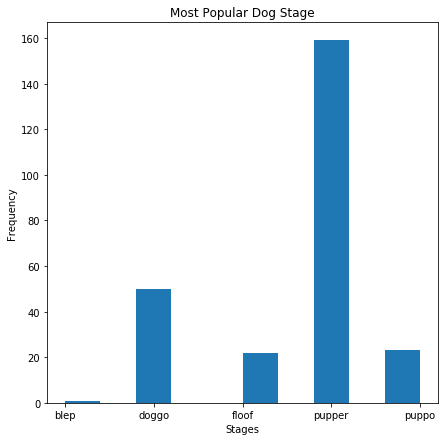

In [55]:
stages = df[~(df.stage.isna())]

plt.figure(figsize=(7,7))
plt.hist(stages.stage)
plt.title("Most Popular Dog Stage")
plt.ylabel('Frequency')
plt.xlabel('Stages');
